# 3. Data visualization
## 3.1 Time Series

In [1]:
#loanding pandas and matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re as re
import datetime as datetime

%matplotlib inline 


In [2]:
#READ IN CSV HERE>>
df_final_1 = pd.read_csv('df_final_user_primary_lang.csv')

#Should load in a .csv file with (23123,6) dimentions
df_final_1.head()

,tweet_username,primary_lang,city,tweet_date,user_tweet_count,city_lang_total,city_total,lang_share
0,zzzkaki,ja,paris,2017-07-20,1,12,1882,0.006376
1,TPhiizL,en,paris,2014-10-20,2,703,8970,0.078372
2,ozgurozsar,tr,paris,2016-04-20,1,12,2887,0.004157
3,ozgurozgencer,tr,paris,2019-04-20,1,106,8764,0.012095
4,TMontparnasse,fr,paris,2019-10-20,1,6716,8445,0.795263


In [3]:
df_final_total = df_final_1.groupby(["city", "primary_lang", "lang_share", "tweet_date"])["primary_lang"].count().reset_index(name="lang_count").sort_values(by='tweet_date', ascending=True)
df_final_total.head()

,city,primary_lang,lang_share,tweet_date,lang_count
1615,munich,hr,0.001661,2014-04-20,1
1345,gaziantep,so,0.003373,2014-04-20,2
1357,gaziantep,sv,0.002530,2014-04-20,2
1361,gaziantep,sw,0.001686,2014-04-20,2
136,berlin,el,0.000482,2014-04-20,1


In [4]:
#Gaziantep
df_final_gaziantep = pd.DataFrame(df_final_total[df_final_total['city'] == "gaziantep"])
print(df_final_gaziantep[df_final_gaziantep['lang_count'] >= 10])
print(df_final_gaziantep.primary_lang.unique())
df_final_gaziantep.head()

           city primary_lang  lang_share  tweet_date  lang_count
1384  gaziantep           tr    0.849916  2014-04-20         398
1213  gaziantep           en    0.096121  2014-04-20          56
1256  gaziantep           id    0.014334  2014-04-20          10
1207  gaziantep           en    0.063590  2014-07-20          34
1391  gaziantep           tr    0.892308  2014-07-20         312
1392  gaziantep           tr    0.894942  2014-10-20         314
1205  gaziantep           en    0.042802  2014-10-20          16
1393  gaziantep           tr    0.898403  2015-01-20         296
1203  gaziantep           en    0.030479  2015-01-20          11
1396  gaziantep           tr    0.929024  2015-04-20         337
1201  gaziantep           en    0.026616  2015-04-20          11
1383  gaziantep           tr    0.848901  2015-07-20         177
1209  gaziantep           en    0.068681  2015-07-20          11
1388  gaziantep           tr    0.869681  2015-10-20         167
1210  gaziantep          

,city,primary_lang,lang_share,tweet_date,lang_count
1345,gaziantep,so,0.003373,2014-04-20,2
1357,gaziantep,sv,0.002530,2014-04-20,2
1361,gaziantep,sw,0.001686,2014-04-20,2
1369,gaziantep,tl,0.004216,2014-04-20,5
1384,gaziantep,tr,0.849916,2014-04-20,398


In [5]:
df_final_gaziantep = df_final_gaziantep.pivot(index='tweet_date', columns='primary_lang', values='lang_share')
df_final_gaziantep.head()

primary_lang,af,ar,ca,cy,da,de,en,es,et,fa,...,sk,sl,so,sq,sv,sw,tl,tr,ur,vi
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.000843,0.003373,NaN,NaN,0.002530,0.003373,0.096121,NaN,0.000843,NaN,...,NaN,NaN,0.003373,NaN,0.002530,0.001686,0.004216,0.849916,NaN,NaN
2014-07-20,NaN,0.013333,NaN,0.001026,0.001026,NaN,0.063590,NaN,0.001026,0.001026,...,NaN,NaN,0.001026,NaN,0.001026,NaN,0.002051,0.892308,NaN,NaN
2014-10-20,NaN,0.002594,NaN,NaN,0.001297,0.002594,0.042802,0.005188,0.001297,NaN,...,NaN,NaN,0.003891,NaN,NaN,NaN,0.009079,0.894942,NaN,NaN
2015-01-20,0.001451,0.005806,NaN,0.001451,0.002903,0.010160,0.030479,NaN,0.001451,NaN,...,0.001451,NaN,0.007257,NaN,0.001451,0.001451,0.008708,0.898403,0.005806,NaN
2015-04-20,NaN,NaN,NaN,NaN,0.001267,0.001267,0.026616,NaN,NaN,NaN,...,NaN,0.001267,0.006337,NaN,0.001267,NaN,0.003802,0.929024,NaN,NaN


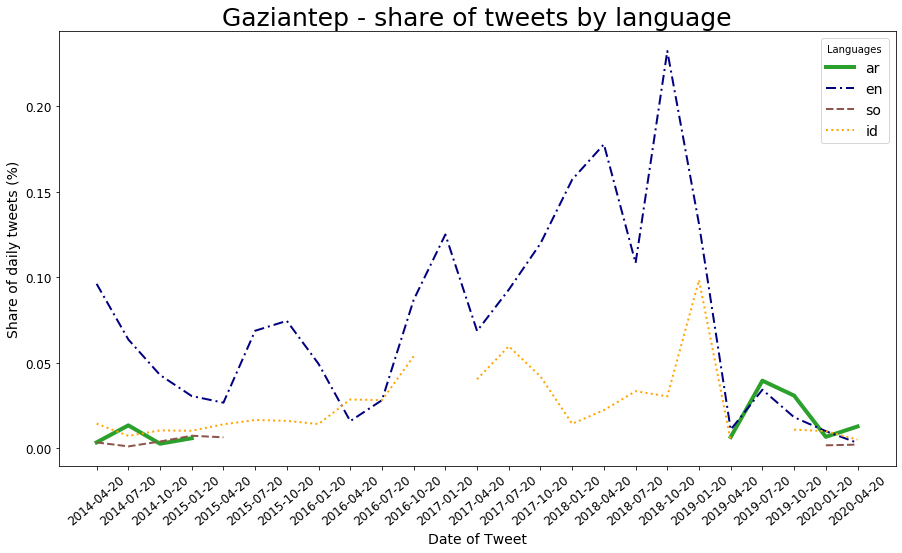

In [6]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(df_final_gaziantep.ar, color='tab:green', linewidth=4, linestyle='-')
#plt.plot(df_final_gaziantep.tr, color='tab:red', linewidth=2, linestyle=':')
plt.plot(df_final_gaziantep.en, color='navy', linewidth=2, linestyle=(0, (5,2,1,2)))
plt.plot(df_final_gaziantep.so, color='tab:brown', linewidth=2, linestyle='--')
#plt.plot(df_final_gaziantep.fr, color='tab:orange', linewidth=2, linestyle='--' )
plt.plot(df_final_gaziantep.id, color='orange', linewidth=2, linestyle=':')

plt.title("Gaziantep - share of tweets by language", fontsize=25)
plt.xlabel("Date of Tweet", fontsize=14)
plt.ylabel("Share of daily tweets (%)", fontsize=14)
plt.legend(["ar",'en',"so","id"], bbox_to_anchor=(1,1), title = 'Languages', fontsize=14)
ax.tick_params(axis="x", labelsize=12, rotation=40)
ax.tick_params(axis="y", labelsize=12)
plt.savefig('language_share_over_time.png')

In [7]:
#Budapest
df_final_budapest = pd.DataFrame(df_final_total[df_final_total['city'] == "budapest"])
print(df_final_budapest[df_final_budapest['lang_count'] >= 10])
print(df_final_budapest.primary_lang.unique())

          city        primary_lang  lang_share  tweet_date  lang_count
750   budapest                  en    0.402385  2014-04-20         113
856   budapest                  hu    0.330849  2014-04-20          71
781   budapest                  es    0.035768  2014-04-20          14
1130  budapest                  tr    0.038748  2014-04-20          10
857   budapest                  hu    0.336317  2014-07-20          70
785   budapest                  es    0.054987  2014-07-20          18
747   budapest                  en    0.383632  2014-07-20         122
866   budapest                  hu    0.427523  2014-10-20          81
755   budapest                  en    0.420183  2014-10-20          88
753   budapest                  en    0.417391  2015-01-20          96
864   budapest                  hu    0.406522  2015-01-20          68
862   budapest                  hu    0.357877  2015-04-20          76
760   budapest                  en    0.482877  2015-04-20         102
759   

In [8]:
df_final_budapest = df_final_budapest.pivot(index='tweet_date', columns='primary_lang', values='lang_share')
df_final_budapest.head()

primary_lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,sv,sw,ta,th,tl,tr,uk,ur,vi,zh-cn
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.001490,0.001490,NaN,NaN,0.001490,0.001490,0.001490,0.007452,NaN,0.402385,...,0.002981,NaN,NaN,0.002981,0.010432,0.038748,NaN,NaN,NaN,NaN
2014-07-20,0.001279,NaN,NaN,0.011509,NaN,NaN,0.011509,0.002558,0.005115,0.383632,...,0.005115,NaN,NaN,NaN,0.003836,0.012788,0.001279,NaN,NaN,NaN
2014-10-20,0.005505,0.003670,NaN,NaN,NaN,NaN,NaN,0.001835,NaN,0.420183,...,0.003670,NaN,NaN,NaN,0.009174,0.012844,NaN,NaN,NaN,NaN
2015-01-20,NaN,0.002174,NaN,0.002174,0.004348,0.004348,0.002174,0.015217,NaN,0.417391,...,0.004348,NaN,NaN,NaN,0.002174,0.015217,NaN,NaN,NaN,NaN
2015-04-20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041096,NaN,0.482877,...,0.005137,NaN,NaN,NaN,0.003425,0.008562,NaN,NaN,NaN,NaN


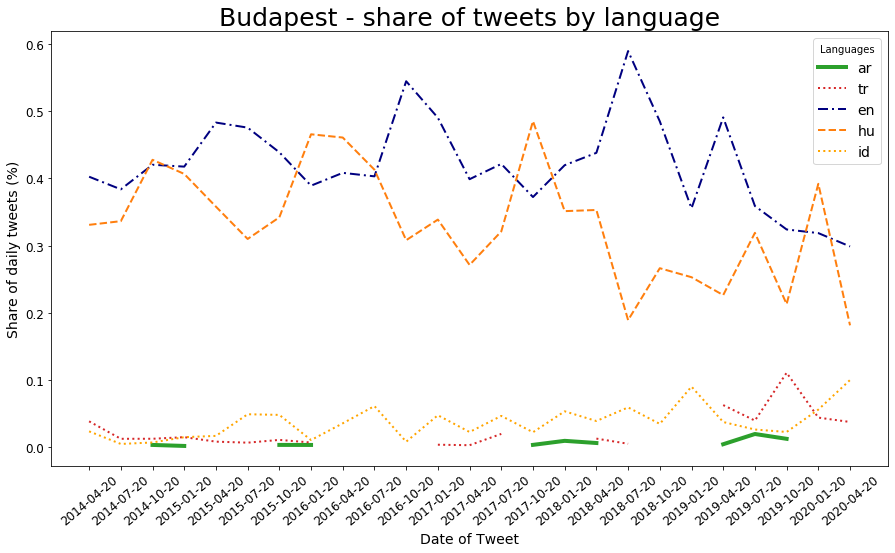

In [9]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(df_final_budapest.ar, color='tab:green', linewidth=4, linestyle='-')
plt.plot(df_final_budapest.tr, color='tab:red', linewidth=2, linestyle=':')
plt.plot(df_final_budapest.en, color='navy', linewidth=2, linestyle=(0, (5,2,1,2)))
#plt.plot(df_final_budapest.so, color='tab:brown', linewidth=2, linestyle='--')
plt.plot(df_final_budapest.hu, color='tab:orange', linewidth=2, linestyle='--' )
plt.plot(df_final_budapest.id, color='orange', linewidth=2, linestyle=':')

plt.title("Budapest - share of tweets by language", fontsize=25)
plt.xlabel("Date of Tweet", fontsize=14)
plt.ylabel("Share of daily tweets (%)", fontsize=14)
plt.legend(["ar",'tr','en','hu',"id"], bbox_to_anchor=(1,1), title = 'Languages', fontsize=14)
ax.tick_params(axis="x", labelsize=12, rotation=40)
ax.tick_params(axis="y", labelsize=12)
plt.savefig('language_share_over_time.png')

In [10]:
#Munich
df_final_munich = pd.DataFrame(df_final_total[df_final_total['city'] == "munich"])
print(df_final_munich[df_final_munich['lang_count'] >= 10])
print(df_final_munich.primary_lang.unique())

        city        primary_lang  lang_share  tweet_date  lang_count
1891  munich                  tr    0.043189  2014-04-20          14
1525  munich                  en    0.313953  2014-04-20         127
1560  munich                  es    0.038206  2014-04-20          20
1483  munich                  de    0.358804  2014-04-20         131
1607  munich                  fr    0.075377  2014-07-20          15
1482  munich                  de    0.354271  2014-07-20         147
1562  munich                  es    0.061139  2014-07-20          29
1521  munich                  en    0.279732  2014-07-20         148
1435  munich                  ar    0.050251  2014-07-20          16
1895  munich                  tr    0.061977  2014-07-20          22
1437  munich                  ar    0.055687  2014-10-20          13
1556  munich                  es    0.028436  2014-10-20          11
1516  munich                  en    0.210900  2014-10-20          84
1499  munich                  de  

In [11]:
df_final_munich = df_final_munich.pivot(index='tweet_date', columns='primary_lang', values='lang_share')
df_final_munich.head()

primary_lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,sv,sw,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.000831,0.030731,NaN,0.000831,NaN,0.000831,0.002492,0.358804,NaN,0.313953,...,0.000831,NaN,0.012458,NaN,0.043189,0.001661,NaN,0.000831,NaN,NaN
2014-07-20,0.005025,0.050251,0.000838,0.000838,0.002513,NaN,0.002513,0.354271,0.001675,0.279732,...,0.000838,NaN,NaN,0.000838,0.061977,0.003350,NaN,NaN,NaN,NaN
2014-10-20,NaN,0.055687,0.001185,NaN,NaN,NaN,NaN,0.542654,0.003555,0.210900,...,0.004739,NaN,NaN,0.003555,0.021327,NaN,NaN,NaN,NaN,NaN
2015-01-20,0.002395,0.016766,0.001198,NaN,NaN,NaN,0.004790,0.485030,0.001198,0.338922,...,0.002395,NaN,NaN,0.001198,0.026347,0.001198,NaN,NaN,NaN,NaN
2015-04-20,0.001001,0.027027,0.001001,NaN,0.001001,NaN,0.003003,0.429429,NaN,0.297297,...,0.004004,0.003003,0.011011,NaN,0.044044,NaN,NaN,NaN,NaN,NaN


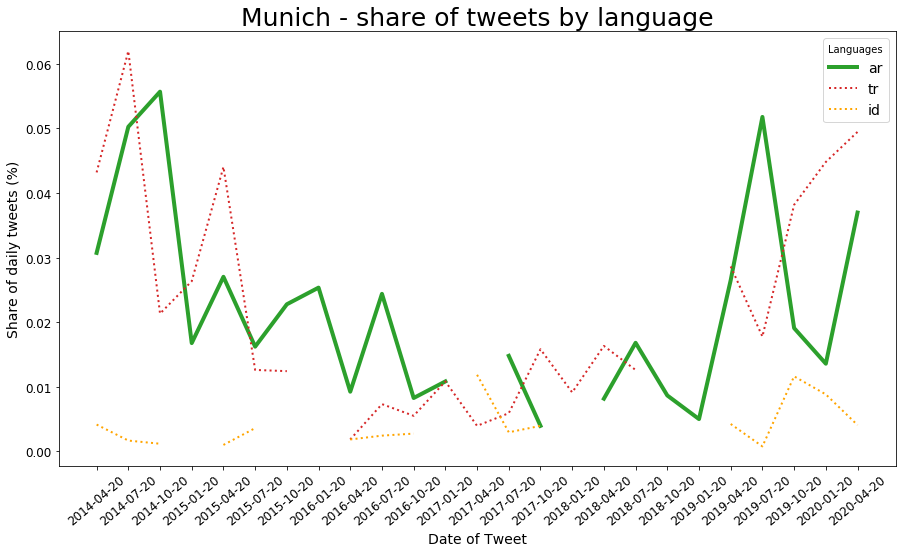

In [12]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(df_final_munich.ar, color='tab:green', linewidth=4, linestyle='-')
plt.plot(df_final_munich.tr, color='tab:red', linewidth=2, linestyle=':')
#plt.plot(df_final_munich.en, color='navy', linewidth=2, linestyle=(0, (5,2,1,2)))
#plt.plot(df_final_munich.so, color='tab:brown', linewidth=2, linestyle='--')
#plt.plot(df_final_munich.hu, color='tab:orange', linewidth=2, linestyle='--' )
plt.plot(df_final_munich.id, color='orange', linewidth=2, linestyle=':')

plt.title("Munich - share of tweets by language", fontsize=25)
plt.xlabel("Date of Tweet", fontsize=14)
plt.ylabel("Share of daily tweets (%)", fontsize=14)
plt.legend(["ar",'tr',"id"], bbox_to_anchor=(1,1), title = 'Languages', fontsize=14)
ax.tick_params(axis="x", labelsize=12, rotation=40)
ax.tick_params(axis="y", labelsize=12)
plt.savefig('language_share_over_time.png')

In [13]:
#Berlin
df_final_berlin = pd.DataFrame(df_final_total[df_final_total['city'] == "berlin"])
print(df_final_berlin[df_final_berlin['lang_count'] >= 10])
print(df_final_berlin.primary_lang.unique())

       city        primary_lang  lang_share  tweet_date  lang_count
157  berlin                  en    0.357590  2014-04-20         252
398  berlin                  nl    0.015422  2014-04-20          17
114  berlin                  de    0.384578  2014-04-20         235
192  berlin                  es    0.055422  2014-04-20          34
622  berlin                  tr    0.038072  2014-04-20          22
325  berlin                  it    0.013575  2014-07-20          11
621  berlin                  tr    0.033320  2014-07-20          19
459  berlin                  pt    0.015220  2014-07-20          12
509  berlin                  ru    0.025093  2014-07-20          16
385  berlin                  nl    0.007816  2014-07-20          16
111  berlin                  de    0.348828  2014-07-20         248
193  berlin                  es    0.062526  2014-07-20          44
37   berlin                  ar    0.025504  2014-07-20          11
234  berlin                  fr    0.007816  201

In [14]:
df_final_berlin = df_final_berlin.pivot(index='tweet_date', columns='primary_lang', values='lang_share')
df_final_berlin.head()

primary_lang,af,ar,bg,ca,cs,cy,da,de,el,en,...,sv,sw,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.003855,0.029398,0.001928,0.002410,NaN,0.001446,0.000964,0.384578,0.000482,0.357590,...,0.014940,NaN,0.004819,0.001928,0.038072,NaN,0.000482,NaN,NaN,NaN
2014-07-20,0.002468,0.025504,0.001234,0.000823,NaN,0.000411,0.001645,0.348828,NaN,0.378445,...,0.010695,NaN,0.006993,0.000411,0.033320,0.001234,NaN,0.001234,NaN,NaN
2014-10-20,0.000510,0.015816,0.000510,0.002041,NaN,NaN,0.000510,0.463265,0.001531,0.343878,...,0.013776,0.000510,0.002551,0.000510,0.042857,NaN,NaN,0.000510,NaN,NaN
2015-01-20,0.005932,0.019278,NaN,0.001977,0.001483,NaN,0.000494,0.475531,0.000989,0.351458,...,0.010875,0.000494,NaN,0.001977,0.032130,NaN,NaN,0.000494,NaN,NaN
2015-04-20,0.003552,0.038188,NaN,0.002664,0.000444,0.002664,0.000888,0.471581,0.002664,0.279307,...,0.012877,NaN,0.006661,0.002664,0.071492,NaN,0.000888,NaN,NaN,NaN


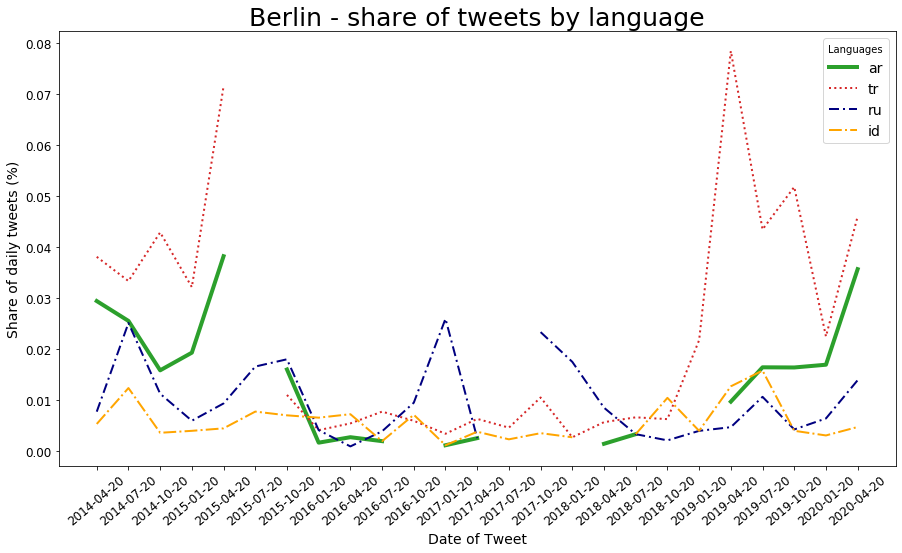

In [15]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(df_final_berlin.ar, color='tab:green', linewidth=4, linestyle='-')
plt.plot(df_final_berlin.tr, color='tab:red', linewidth=2, linestyle=':')
plt.plot(df_final_berlin.ru, color='navy', linewidth=2, linestyle=(0, (5,2,1,2)))
#plt.plot(df_final_berlin.so, color='tab:brown', linewidth=2, linestyle='--')
#plt.plot(df_final_berlin.hu, color='tab:orange', linewidth=2, linestyle='--' )
plt.plot(df_final_berlin.id, color='orange', linewidth=2, linestyle='-.')

plt.title("Berlin - share of tweets by language", fontsize=25)
plt.xlabel("Date of Tweet", fontsize=14)
plt.ylabel("Share of daily tweets (%)", fontsize=14)
plt.legend(["ar",'tr','ru', "id"], bbox_to_anchor=(1,1), title = 'Languages', fontsize=14)
ax.tick_params(axis="x", labelsize=12, rotation=40)
ax.tick_params(axis="y", labelsize=12)
plt.savefig('language_share_over_time.png')

In [16]:
#Paris
df_final_paris = pd.DataFrame(df_final_total[df_final_total['city'] == "paris"])
print(df_final_paris[df_final_paris['lang_count'] >= 10])
print(df_final_paris.primary_lang.unique())

       city        primary_lang  lang_share  tweet_date  lang_count
2202  paris                  fr    0.874904  2014-04-20        1302
2177  paris                  fi    0.002292  2014-04-20          12
2260  paris                  id    0.004803  2014-04-20          13
2278  paris                  it    0.006986  2014-04-20          31
2143  paris                  et    0.002183  2014-04-20          10
2099  paris                  es    0.005458  2014-04-20          27
2077  paris                  en    0.050431  2014-04-20         165
2063  paris                  de    0.006986  2014-04-20          12
1990  paris                  ca    0.005021  2014-04-20          23
2571  paris                  so    0.003930  2014-04-20          18
2405  paris                  nl    0.005895  2014-04-20          28
2434  paris                  no    0.003056  2014-04-20          11
2459  paris                  pt    0.009278  2014-04-20          20
2141  paris                  et    0.001635  201

In [17]:
df_final_paris = df_final_paris.pivot(index='tweet_date', columns='primary_lang', values='lang_share')
df_final_paris.head()

primary_lang,af,ar,bg,bn,ca,cs,cy,da,de,el,...,sw,ta,th,tl,tr,uk,ur,vi,zh-cn,zh-tw
tweet_date,,,,,,,,,,,,,,,,,,,,,
2014-04-20,0.002074,0.001965,NaN,NaN,0.005021,0.000218,0.000546,0.000437,0.006986,NaN,...,0.000655,NaN,NaN,0.000982,0.001528,NaN,NaN,0.000437,NaN,NaN
2014-07-20,0.000436,0.001526,0.001308,NaN,0.003707,0.000109,0.003707,0.000218,0.006214,NaN,...,0.000872,NaN,0.000327,0.000872,0.000327,NaN,NaN,NaN,NaN,NaN
2014-10-20,0.003233,0.004125,NaN,NaN,0.005797,NaN,0.000892,NaN,0.001784,NaN,...,0.000334,NaN,NaN,0.001226,0.000334,NaN,NaN,0.000111,NaN,NaN
2015-01-20,0.001551,0.003324,NaN,NaN,0.001994,0.000111,0.000222,0.000111,0.003213,NaN,...,0.000443,0.000111,NaN,0.001440,0.001551,NaN,NaN,NaN,0.000111,NaN
2015-04-20,0.001662,0.001994,0.002216,NaN,0.002437,NaN,0.000886,0.000332,0.004542,NaN,...,0.000886,NaN,0.000111,0.000775,0.001883,NaN,0.000222,0.000332,NaN,NaN


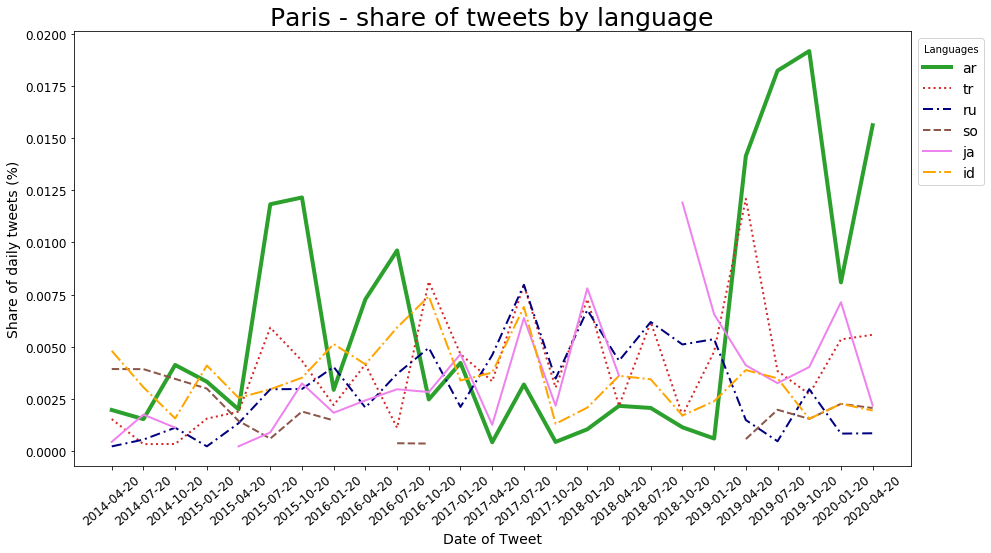

In [18]:
fig, ax = plt.subplots(figsize=(15, 8))
plt.plot(df_final_paris.ar, color='tab:green', linewidth=4, linestyle='-')
plt.plot(df_final_paris.tr, color='tab:red', linewidth=2, linestyle=':')
plt.plot(df_final_paris.ru, color='navy', linewidth=2, linestyle=(0, (5,2,1,2)))
plt.plot(df_final_paris.so, color='tab:brown', linewidth=2, linestyle='--')
plt.plot(df_final_paris.ja, color='violet', linewidth=2, linestyle='-' )
plt.plot(df_final_paris.id, color='orange', linewidth=2, linestyle='-.')

plt.title("Paris - share of tweets by language", fontsize=25)
plt.xlabel("Date of Tweet", fontsize=14)
plt.ylabel("Share of daily tweets (%)", fontsize=14)
plt.legend(["ar",'tr','ru', 'so','ja',"id"], bbox_to_anchor=(1,1), title = 'Languages', fontsize=14)
ax.tick_params(axis="x", labelsize=12, rotation=40)
ax.tick_params(axis="y", labelsize=12)
plt.savefig('language_share_over_time.png')